**BEFORE ANYTHING, IMPORT THE NECESSARY LIBRARIES**

In [232]:
# ENTER YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

## SUPERVISED LEARNING

As described in class, the datapoints used in supervised learning are associated with output labels which are used for training. The models trained are then used to predict on similar unseen data to produce similar labels.

Supervised learning is broadly divided into two parts:
- Regression: The output labels are continuous in nature.

*(Content shortened for brevity)*

### BINARY CLASSIFICATION

In [233]:
! gdown 1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP

Downloading...
From: https://drive.google.com/uc?id=1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP
To: /content/nba_logreg.csv
100% 129k/129k [00:00<00:00, 64.8MB/s]


**Import the csv file `NBA_logreg.csv` as a Pandas dataframe.**

In [234]:
# ENTER YOUR CODE HERE
data = pd.read_csv('/content/nba_logreg.csv')

**Lets analyse the data a tiny bit!**

**What are the no. of rows and columns in the dataset?**

In [235]:
#ENTER YOUR CODE HERE
data.shape

(1340, 21)

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

**What are the columns?**

In [92]:
#ENTER YOUR CODE HERE

In [237]:
data.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

**What does the beginning of the dataset look like?**

In [ ]:
#ENTER YOUR CODE HERE

In [238]:
data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Actually, the given dataset describes the player history of several NBA players. The column 'TARGET_5yrs' only contains the values 0 and 1, with 0 standing for players who played for less than 5 years, and 1 for players who played for more than or equal to 5 years. Thus, 0 and 1 stand for 2 classes- binary classification!

**Clean the dataset. Drop the NaN values!**



In [239]:
#ENTER YOUR CODE HERE
data.isnull().sum()

,0
Name,0
GP,0
MIN,0
PTS,0
FGM,0
FGA,0
FG%,0
3P Made,0
3PA,0
3P%,11


In [240]:
data.dropna(inplace=True)

**What is the shape of the dataframe now?**

In [241]:
#ENTER YOUR CODE HERE
data.shape

(1329, 21)

In [242]:
print("Shape of the dataframe post dropping rows with NaN values is:", data.shape)

Shape of the dataframe post dropping rows with NaN values is: (1329, 21)


**For training, first create a dataframe that stores the columns to be used for training, and another dataframe that stores the labels.**

In [243]:
#ENTER YOUR CODE HERE
x = data.drop(['TARGET_5Yrs','Name'], axis=1)
y = data['TARGET_5Yrs']

In [244]:
print("The shape of the features datafarme is:",x.shape)
print("The shape of the labels dataframe is:",y.shape)

The shape of the features datafarme is: (1329, 19)
The shape of the labels dataframe is: (1329,)


It is considered best practice to divide the dataset into two parts- test and train(Search the internet for the reason- we'll ask in class :)).

**Import the sklearn module that allows us to split the dataset into train and test.**

In [245]:
#ENTER YOUR CODE HERE
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Now divide the features and label dataframes into train and test splits.**

In [246]:
#ENTER YOUR CODE HERE
x_train.shape

(1063, 19)

In [247]:
print("The shape of training features dataframe is:",x_train.shape)
print("The shape of testing features dataframe is:",x_test.shape)
print("The shape of training labels dataframe is:",y_train.shape)
print("The shape of testing labels dataframe is:",y_test.shape)
print("The train-to-test split ratio is:",x_train.shape[0]/x_test.shape[0])

The shape of training features dataframe is: (1063, 19)
The shape of testing features dataframe is: (266, 19)
The shape of training labels dataframe is: (1063,)
The shape of testing labels dataframe is: (266,)
The train-to-test split ratio is: 3.9962406015037595


**Now load the sklearn module that allows the creation of a logistic regression model.**

In [248]:
#ENTER YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

**Onto training! Train the a logistic regression model using the training features and labels dataframes.**

In [249]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

Your model is trained! Time to check how good it is by using it on the testing dataframe.
Some metrics are used to check the reliability of a model.

**As an exercise, read about these and fill out the markdown below!**


- Accuracy:
- F1 score:
- Precision:
- Recall:

All of these can be calculated for our model using sklearn modules.

**Import them!**

In [250]:
#ENTER YOUR CODE HERE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

**Now test on the testing dataframe and print all of these metrics.**

In [251]:
#ENTER YOUR CODE HERE
y_pred = model.predict(x_test)

In [252]:

accuracy  = accuracy_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)


print("Accuracy of the model is:", accuracy)
print("F1 score of the model is:", f1)
print("Precision of the model is:", precision)
print("Recall of the model is:", recall)

Accuracy of the model is: 0.7330827067669173
F1 score of the model is: 0.8033240997229917
Precision of the model is: 0.7837837837837838
Recall of the model is: 0.8238636363636364


**Your Logistic Regression model is well trained!**

Support Vector Machine is another model that can be used both for regression and classification. We'll be training a classification model on our current dataset.

**Import the sklearn module that is used to implement a classification SVM**

In [253]:
#ENTER YOUR CODE HERE
from sklearn.svm import SVC

**Just as we had before, load and fit a model on our training dataset.**

In [254]:
model = SVC()  # You can also use 'rbf', 'poly', etc.
# Train the model
model.fit(x_train, y_train)

SVC()

**Now test the model on the training dataset, and check the relevant metrics!**

In [255]:
#ENTER YOUR CODE HERE
y_pred = model.predict(x_test)

In [256]:
accuracy  = accuracy_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)


print("Accuracy of the model is:", accuracy)
print("F1 score of the model is:", f1)
print("Precision of the model is:", precision)
print("Recall of the model is:", recall)

Accuracy of the model is: 0.7443609022556391
F1 score of the model is: 0.8131868131868132
Precision of the model is: 0.7872340425531915
Recall of the model is: 0.8409090909090909


### MULTICLASS CLASSIFICATION

In [257]:
! gdown 1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC

Downloading...
From: https://drive.google.com/uc?id=1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC
To: /content/social_well_being.csv
100% 43.1k/43.1k [00:00<00:00, 73.9MB/s]


In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import the csv `social_well_being.csv` as a pandas dataframe.**

In [259]:
#ENTER YOUR CODE HERE
data = pd.read_csv('/content/social_well_being.csv')

**Always analyse the data.**

In [260]:
#ENTER YOUR CODE HERE
data.shape

(924, 10)

In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     924 non-null    int64 
 1   Age                         924 non-null    int64 
 2   Gender                      924 non-null    object
 3   Platform                    924 non-null    object
 4   Daily_Usage_Time (minutes)  924 non-null    int64 
 5   Posts_Per_Day               924 non-null    int64 
 6   Likes_Received_Per_Day      924 non-null    int64 
 7   Comments_Received_Per_Day   924 non-null    int64 
 8   Messages_Sent_Per_Day       924 non-null    int64 
 9   Dominant_Emotion            924 non-null    object
dtypes: int64(7), object(3)
memory usage: 72.3+ KB


In [262]:
data.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [263]:
data.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


Since its multiclass-classification, the classes column 'Dominant_Emotion' has more than two classes.

**Can you find out what these classes are?**

In [264]:
#ENTER YOUR CODE HERE

In [265]:
print("The classes are:" , data['Dominant_Emotion'].unique())


The classes are: ['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']


Actually this isn't the only categorical column in the dataset. There are other too.

**Print their values as well!**

In [266]:
#ENTER YOUR CODE HERE

In [267]:
print("The genders are: ", data['Gender'].unique())
print("The platforms are: ", data['Platform'].unique())

The genders are:  ['Female' 'Male' 'Non-binary']
The platforms are:  ['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


Many models, including KNN, will only work with numerical data. Hence the textual categories need to go. We will use something called "one-hot encoding" for transforming our features and "labelling" for our categories.

**Import the pandas module used for one-hot encoding**

In [268]:
#ENTER YOUR CODE HERE
import pandas as pd

**First One-Hot Encode the 'Gender' column and replace the 'Gender' column with this.**

In [269]:
# This step has already been completed.

data = pd.get_dummies(data, columns=['Gender'], drop_first=False, dtype=int)

In [270]:
data

,User_ID,Age,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Gender_Female,Gender_Male,Gender_Non-binary
0,1,25,Instagram,120,3,45,10,12,Happiness,1,0,0
1,2,30,Twitter,90,5,20,25,30,Anger,0,1,0
2,3,22,Facebook,60,2,15,5,20,Neutral,0,0,1
3,4,28,Instagram,200,8,100,30,50,Anxiety,1,0,0
4,5,33,LinkedIn,45,1,5,2,10,Boredom,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,Twitter,85,4,35,18,18,Boredom,0,0,1
920,997,22,Facebook,70,1,14,6,10,Neutral,1,0,0
921,998,35,Whatsapp,110,3,50,25,25,Happiness,0,1,0
922,999,28,Telegram,60,2,18,8,18,Anger,0,0,1


**Repeat the drill for the column 'Platform'.**

In [271]:
data = pd.get_dummies(data, columns=['Platform'], drop_first=False, dtype=int)

In [272]:
data

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Gender_Female,Gender_Male,Gender_Non-binary,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,1,25,120,3,45,10,12,Happiness,1,0,0,0,1,0,0,0,0,0
1,2,30,90,5,20,25,30,Anger,0,1,0,0,0,0,0,0,1,0
2,3,22,60,2,15,5,20,Neutral,0,0,1,1,0,0,0,0,0,0
3,4,28,200,8,100,30,50,Anxiety,1,0,0,0,1,0,0,0,0,0
4,5,33,45,1,5,2,10,Boredom,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,Boredom,0,0,1,0,0,0,0,0,1,0
920,997,22,70,1,14,6,10,Neutral,1,0,0,1,0,0,0,0,0,0
921,998,35,110,3,50,25,25,Happiness,0,1,0,0,0,0,0,0,0,1
922,999,28,60,2,18,8,18,Anger,0,0,1,0,0,0,0,1,0,0


In [273]:
data.shape

(924, 18)

Last categorical feature is our label column.

**Import the module used for label encoding.**

In [274]:
from sklearn.preprocessing import LabelEncoder

**Now label encode the column 'Dominant_Emotion'**

In [275]:
label_encoder = LabelEncoder()
data['Dominant_Emotion_Encoded'] = label_encoder.fit_transform(data['Dominant_Emotion'])
data.drop("Dominant_Emotion", axis=1, inplace=True)

In [276]:
data

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Gender_Female,Gender_Male,Gender_Non-binary,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp,Dominant_Emotion_Encoded
0,1,25,120,3,45,10,12,1,0,0,0,1,0,0,0,0,0,3
1,2,30,90,5,20,25,30,0,1,0,0,0,0,0,0,1,0,0
2,3,22,60,2,15,5,20,0,0,1,1,0,0,0,0,0,0,4
3,4,28,200,8,100,30,50,1,0,0,0,1,0,0,0,0,0,1
4,5,33,45,1,5,2,10,0,1,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85,4,35,18,18,0,0,1,0,0,0,0,0,1,0,2
920,997,22,70,1,14,6,10,1,0,0,1,0,0,0,0,0,0,4
921,998,35,110,3,50,25,25,0,1,0,0,0,0,0,0,0,1,3
922,999,28,60,2,18,8,18,0,0,1,0,0,0,0,1,0,0,0


In [277]:
data.shape

(924, 18)

Now we have only numerical data, phew! Lets start training!

**Create the freatures dataframe and the labels dataframe as we had done before, and split them into train and test parts. Do you need to import the libraries again?**

In [278]:
#ENTER YOUR CODE HERE
from sklearn.model_selection import train_test_split

In [279]:
l = data.drop(['Dominant_Emotion_Encoded',"User_ID"], axis=1)
r = data['Dominant_Emotion_Encoded']

In [280]:
l.shape

(924, 16)

In [281]:
x_train,x_test,y_train,y_test = train_test_split(l,r, test_size=0.2, random_state=42)

In [282]:
x_train.shape

(739, 16)

In [283]:
print("The shape of training features dataframe is:",x_train.shape)
print("The shape of testing features dataframe is:",x_test.shape)
print("The shape of training labels dataframe is:",y_train.shape)
print("The shape of testing labels dataframe is:",y_test.shape)
print("The train-to-test split ratio is:",x_train.shape[0]/x_test.shape[0])

The shape of training features dataframe is: (739, 16)
The shape of testing features dataframe is: (185, 16)
The shape of training labels dataframe is: (739,)
The shape of testing labels dataframe is: (185,)
The train-to-test split ratio is: 3.9945945945945946


**Import the module used for training a KNN model.**

In [284]:
#ENTER YOUR CODE HERE
from sklearn.neighbors import KNeighborsClassifier

**Train your model.**

In [285]:
#ENTER YOUR CODE HERE
model = KNeighborsClassifier()

In [286]:
model.fit(x_train, y_train)

KNeighborsClassifier()

**Create and print the Prediction Dataframe.**

In [287]:
#ENTER YOUR CODE HERE
y_pred = model.predict(x_test)

In [288]:
y_pred

array([0, 0, 2, 3, 4, 1, 4, 1, 4, 2, 4, 4, 2, 3, 1, 1, 1, 1, 3, 3, 0, 2,
       4, 3, 2, 4, 0, 1, 0, 4, 1, 5, 1, 3, 0, 1, 0, 3, 5, 1, 0, 0, 5, 4,
       3, 4, 4, 0, 3, 2, 5, 1, 1, 5, 3, 0, 1, 4, 1, 3, 1, 3, 0, 1, 3, 3,
       3, 1, 4, 3, 4, 2, 2, 1, 4, 3, 4, 3, 0, 5, 5, 4, 5, 0, 3, 3, 0, 0,
       5, 3, 1, 4, 0, 5, 4, 3, 3, 5, 3, 5, 5, 1, 2, 3, 4, 3, 5, 4, 2, 4,
       2, 3, 3, 3, 0, 4, 4, 1, 4, 5, 0, 0, 1, 0, 5, 4, 3, 1, 2, 0, 3, 1,
       5, 2, 1, 3, 4, 3, 5, 3, 1, 2, 2, 3, 4, 4, 0, 5, 4, 3, 4, 1, 2, 4,
       0, 0, 1, 4, 1, 3, 2, 5, 1, 4, 1, 3, 4, 3, 5, 1, 0, 0, 3, 2, 5, 1,
       5, 5, 0, 3, 2, 1, 0, 5, 3])

In [289]:
y_pr = pd.DataFrame(y_pred, columns=['Dominant_Emotion_Encoded_predicted'])
y_pr

,Dominant_Emotion_Encoded_predicted
0,0
1,0
2,2
3,3
4,4
...,...
180,2
181,1
182,0
183,5


I'm guessing you notice the issue. These are not our original labels!

**Tranform these labels using the encoder you had created while encoding 'Dominant_Emotion'.**

In [290]:
#ENTER YOUR CODE HERE
y_pred_labels = label_encoder.inverse_transform(y_pred)
print(y_pred_labels)

['Anger' 'Anger' 'Boredom' 'Happiness' 'Neutral' 'Anxiety' 'Neutral'
 'Anxiety' 'Neutral' 'Boredom' 'Neutral' 'Neutral' 'Boredom' 'Happiness'
 'Anxiety' 'Anxiety' 'Anxiety' 'Anxiety' 'Happiness' 'Happiness' 'Anger'
 'Boredom' 'Neutral' 'Happiness' 'Boredom' 'Neutral' 'Anger' 'Anxiety'
 'Anger' 'Neutral' 'Anxiety' 'Sadness' 'Anxiety' 'Happiness' 'Anger'
 'Anxiety' 'Anger' 'Happiness' 'Sadness' 'Anxiety' 'Anger' 'Anger'
 'Sadness' 'Neutral' 'Happiness' 'Neutral' 'Neutral' 'Anger' 'Happiness'
 'Boredom' 'Sadness' 'Anxiety' 'Anxiety' 'Sadness' 'Happiness' 'Anger'
 'Anxiety' 'Neutral' 'Anxiety' 'Happiness' 'Anxiety' 'Happiness' 'Anger'
 'Anxiety' 'Happiness' 'Happiness' 'Happiness' 'Anxiety' 'Neutral'
 'Happiness' 'Neutral' 'Boredom' 'Boredom' 'Anxiety' 'Neutral' 'Happiness'
 'Neutral' 'Happiness' 'Anger' 'Sadness' 'Sadness' 'Neutral' 'Sadness'
 'Anger' 'Happiness' 'Happiness' 'Anger' 'Anger' 'Sadness' 'Happiness'
 'Anxiety' 'Neutral' 'Anger' 'Sadness' 'Neutral' 'Happiness' 'Happiness'
 'Sa

**Now print the relevant metrics! Don't forget to get original y_test first!**

In [291]:
#ENTER YOUR CODE HERE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [292]:
accuracy  = accuracy_score(y_test, y_pred)

print("Accuracy of the model is:", accuracy)

Accuracy of the model is: 0.9891891891891892


**That's a good model!**

Since it's multi-class classification, traditional metrics like precision and recall won't work. We'll judge our model using a confusion matrix and classification report!

**Import the module for confusion matrix and classification report, and print them.**

In [293]:
#ENTER YOUR CODE HERE
from sklearn.metrics import confusion_matrix, classification_report


In [294]:
# Print Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
# Print Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
 [[29  0  0  0  0  0]
 [ 0 34  1  0  0  0]
 [ 0  0 18  0  0  0]
 [ 0  1  0 42  0  0]
 [ 0  0  0  0 35  0]
 [ 0  0  0  0  0 25]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.97      0.97      0.97        35
           2       0.95      1.00      0.97        18
           3       1.00      0.98      0.99        43
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        25

    accuracy                           0.99       185
   macro avg       0.99      0.99      0.99       185
weighted avg       0.99      0.99      0.99       185



We already have our training and test datasets ready, lets train some other models.

**Import Naive Bayes**

In [295]:
#ENTER YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB

**Now instantiate and fit a model.**

In [296]:
#ENTER YOUR CODE HERE
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

**Predict on the test features, and dont forget to inverse transform!**

In [297]:
#ENTER YOUR CODE HERE
y_pred = model.predict(x_test)
y_pred

array([0, 0, 2, 3, 0, 3, 2, 0, 0, 2, 0, 0, 0, 3, 0, 2, 2, 2, 0, 0, 3, 2,
       2, 3, 2, 3, 0, 0, 0, 2, 3, 5, 0, 3, 0, 3, 0, 3, 0, 2, 0, 0, 0, 2,
       3, 2, 2, 0, 3, 2, 5, 3, 3, 5, 3, 0, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3,
       3, 2, 3, 3, 0, 0, 2, 3, 2, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0,
       2, 3, 5, 2, 0, 5, 2, 3, 3, 2, 3, 2, 0, 3, 2, 5, 0, 3, 5, 0, 2, 2,
       0, 3, 3, 3, 2, 3, 5, 0, 2, 0, 0, 0, 0, 0, 2, 2, 3, 2, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 3, 0, 3, 2, 0, 2, 3, 3, 2, 0, 0, 2, 0, 0, 2, 2, 2,
       3, 2, 0, 0, 3, 3, 2, 3, 3, 2, 2, 3, 0, 3, 0, 0, 3, 3, 3, 2, 2, 2,
       0, 0, 0, 3, 2, 3, 0, 2, 3])

In [298]:
y_pred_encoded = label_encoder.inverse_transform(y_pred)
print(y_pred_encoded)

['Anger' 'Anger' 'Boredom' 'Happiness' 'Anger' 'Happiness' 'Boredom'
 'Anger' 'Anger' 'Boredom' 'Anger' 'Anger' 'Anger' 'Happiness' 'Anger'
 'Boredom' 'Boredom' 'Boredom' 'Anger' 'Anger' 'Happiness' 'Boredom'
 'Boredom' 'Happiness' 'Boredom' 'Happiness' 'Anger' 'Anger' 'Anger'
 'Boredom' 'Happiness' 'Sadness' 'Anger' 'Happiness' 'Anger' 'Happiness'
 'Anger' 'Happiness' 'Anger' 'Boredom' 'Anger' 'Anger' 'Anger' 'Boredom'
 'Happiness' 'Boredom' 'Boredom' 'Anger' 'Happiness' 'Boredom' 'Sadness'
 'Happiness' 'Happiness' 'Sadness' 'Happiness' 'Anger' 'Happiness'
 'Happiness' 'Happiness' 'Happiness' 'Boredom' 'Happiness' 'Anger'
 'Happiness' 'Happiness' 'Happiness' 'Happiness' 'Boredom' 'Happiness'
 'Happiness' 'Anger' 'Anger' 'Boredom' 'Happiness' 'Boredom' 'Happiness'
 'Anger' 'Happiness' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger'
 'Happiness' 'Happiness' 'Anger' 'Anger' 'Boredom' 'Happiness' 'Sadness'
 'Boredom' 'Anger' 'Sadness' 'Boredom' 'Happiness' 'Happiness' 'Boredom'
 'Happines

**Finally, print the accuracy, confusion matrix and classification report.**

In [299]:
#ENTER YOUR CODE HERE
accuracy  = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy of the model is:", accuracy)
print("\nThe confusion matrix is:\n", cm)
print("\nThe classification report is:\n", report)

Accuracy of the model is: 0.42702702702702705

The confusion matrix is:
 [[23  0  2  4  0  0]
 [ 8  0 14 12  0  1]
 [ 4  0 14  0  0  0]
 [ 5  0  0 37  0  1]
 [12  0 17  5  0  1]
 [12  0  7  1  0  5]]

The classification report is:
               precision    recall  f1-score   support

           0       0.36      0.79      0.49        29
           1       0.00      0.00      0.00        35
           2       0.26      0.78      0.39        18
           3       0.63      0.86      0.73        43
           4       0.00      0.00      0.00        35
           5       0.62      0.20      0.30        25

    accuracy                           0.43       185
   macro avg       0.31      0.44      0.32       185
weighted avg       0.31      0.43      0.32       185



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Now train a 'Decision Tree' and a 'Random Forest Generator' for the same classification problem.Feel free to play with the hyperparameters!

### Report the accuracy score for each!

# GOOD JOB!

#Artificial Neural Network Assignment
###In this assignment you will be implementing various functions from scratch so as to learn how it functions before going on to use various libraries. Doing it honestly will help you a lot in you understanding of the topic. If you encounter difficulties or stuck somewhere go online and search, the possibility that you are encountering the problem first time in 8 billion people is very slim so mostly you will be able to find the solution. Happy learning! 😀

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
test = pd.read_csv('/content/mnist_test.csv')
train = pd.read_csv('/content/mnist_train.csv')

In [15]:
x_train = train.drop('label', axis=1)
x_train = x_train.T
x_train = x_train/255
y_train = train.label

x_test = test.drop('label',axis=1)
x_test = x_test.T
y_test = test.label
print(x_train)
print(y_train)

       0      1      2      3      4      5      6      7      8      9      \
1x1      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x2      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x3      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x4      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x5      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
28x24    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x25    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x26    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x27    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x28    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  59990  59991  59992  59993  59994  5999

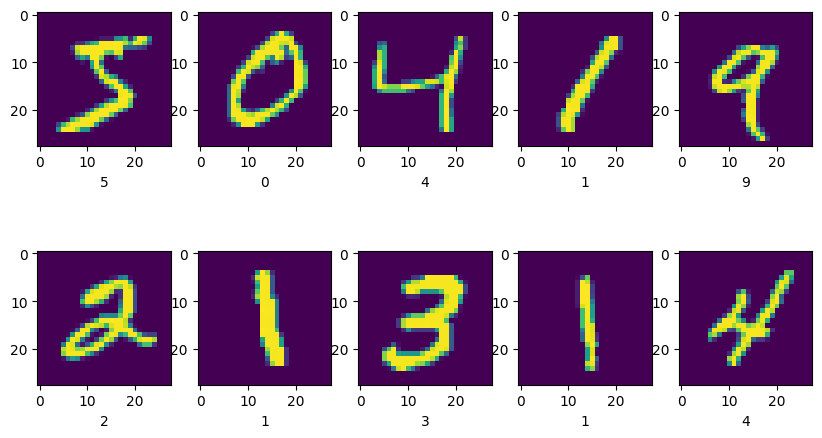

In [16]:
X_train_reshaped = x_train.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(10, 15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.imshow(X_train_reshaped[i])
    plt.xlabel(y_train.iloc[i])

The remainder on dividing your roll number by 4 will dictate which function you have to complete but ofcourse if you wish to do more and there's no stopping you.\
Roll_number % 6  
                  0:RELU\
                  1:softmax\
                  2:forward_propogation\
                  3:one_hot_encode\
                  4:total_loss\
                  5:backward_propagation

In [19]:
import numpy as np

class ANN:
    def __init__(self, input_size, output_size, learning_rate, num_layers, num_of_nodes_layers):
        self.input_size = input_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.num_layers = num_layers
        self.num_of_nodes_layers = num_of_nodes_layers
        self.weights_biases = {}
        self.activations = {}

    def initial_params(self):
        np.random.seed(42)
        self.weights_biases['W1'] = np.random.randn(self.num_of_nodes_layers, self.input_size) * np.sqrt(2 / self.input_size)
        self.weights_biases['b1'] = np.zeros((self.num_of_nodes_layers, 1))

        for i in range(2, self.num_layers + 1):
            self.weights_biases[f'W{i}'] = np.random.randn(self.num_of_nodes_layers, self.num_of_nodes_layers) * np.sqrt(2 / self.num_of_nodes_layers)
            self.weights_biases[f'b{i}'] = np.zeros((self.num_of_nodes_layers, 1))

        self.weights_biases[f'W{self.num_layers + 1}'] = np.random.randn(self.output_size, self.num_of_nodes_layers) * np.sqrt(2 / self.num_of_nodes_layers)
        self.weights_biases[f'b{self.num_layers + 1}'] = np.zeros((self.output_size, 1))

    def RELU(self, Z):
        return np.maximum(0, Z)

    def softmax(self, Z):
        Z -= np.max(Z, axis=0, keepdims=True)  # numerical stability
        exp_Z = np.exp(Z)
        return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

    def forward_propagation(self, X):
        A = X
        self.activations["A0"] = A
        for i in range(1, self.num_layers + 2):
            W = self.weights_biases[f"W{i}"]
            b = self.weights_biases[f"b{i}"]
            Z = np.dot(W, A) + b
            self.activations[f"Z{i}"] = Z

            if i != self.num_layers + 1:
                A = self.RELU(Z)
            else:
                A = self.softmax(Z)

            self.activations[f"A{i}"] = A

        return A, self.activations

    def one_hot_encode(self, y):
        one_hot = np.zeros((self.output_size, y.size))
        one_hot[y, np.arange(y.size)] = 1
        return one_hot

    def total_loss(self, y_pred, Y):
        m = Y.shape[1]
        epsilon = 1e-8
        return -np.sum(Y * np.log(y_pred + epsilon)) / m

    def backward_prop(self, y_pred, Y):
        gradients = {}
        m = Y.shape[1]
        dZ = y_pred - Y

        for i in reversed(range(1, self.num_layers + 2)):
            A_prev = self.activations[f"A{i-1}"]
            gradients[f"dW{i}"] = (1 / m) * np.dot(dZ, A_prev.T)
            gradients[f"db{i}"] = (1 / m) * np.sum(dZ, axis=1, keepdims=True)

            if i > 1:
                W = self.weights_biases[f"W{i}"]
                dA_prev = np.dot(W.T, dZ)
                Z_prev = self.activations[f"Z{i-1}"]
                dZ = dA_prev * (Z_prev > 0)

        return gradients

    def update_params(self, gradients):
        for i in range(1, self.num_layers + 2):
            self.weights_biases[f"W{i}"] -= self.learning_rate * gradients[f"dW{i}"]
            self.weights_biases[f"b{i}"] -= self.learning_rate * gradients[f"db{i}"]

    def train(self, X, y, num_iterations):
        self.initial_params()
        for i in range(1, num_iterations + 1):
            Y = self.one_hot_encode(y)
            y_pred, _ = self.forward_propagation(X)
            loss = self.total_loss(y_pred, Y)

            gradients = self.backward_prop(y_pred, Y)
            self.update_params(gradients)

            if i % 100 == 0 or i == num_iterations:
                print(f"Iteration: {i}, Loss: {loss if not np.isnan(loss) else 'nan'}")

    def predict(self, X):
        A, _ = self.forward_propagation(X)
        return np.argmax(A, axis=0)


In [ ]:
model = ANN(input_size=784, output_size=10, learning_rate=0.2, num_layers=3, num_of_nodes_layers=64)
model.train(x_train, y_train, num_iterations=4000)

Iteration: 100, Loss: 0.28493220882438536
Iteration: 200, Loss: 0.202943868421112
Iteration: 300, Loss: 0.16987635443155044
Iteration: 400, Loss: 0.13796461317313652
Iteration: 500, Loss: 1.4855128269790059
Iteration: 600, Loss: 0.12157866656222027
Iteration: 700, Loss: 0.10215937044358021
Iteration: 800, Loss: 0.09061522225371037
Iteration: 900, Loss: 0.08196160689999103
Iteration: 1000, Loss: 0.07774517066681039
Iteration: 1100, Loss: 0.06958403025371848
Iteration: 1200, Loss: 0.1925284002591963
Iteration: 1300, Loss: 0.12855934716341627
Iteration: 1400, Loss: 0.10434685012929051
Iteration: 1500, Loss: 0.08921570280968613
Iteration: 1600, Loss: 0.07875287406547114
Iteration: 1700, Loss: 0.07143068243712099
Iteration: 1800, Loss: 0.06622893734526268
Iteration: 1900, Loss: 0.0607442906120366
Iteration: 2000, Loss: 0.0552884731706928
Iteration: 2100, Loss: 0.0507867205874287
Iteration: 2200, Loss: 0.04711444897609894
Iteration: 2300, Loss: 0.04442214756703189
Iteration: 2400, Loss: 0.04

In [21]:
m = model.predict(x_test)
b = m.shape
c = int(b[0])
d = np.array(y_test)
d = d.T
t=0
for i in range(c):
    if(m[i]==d[i]):
        t=t+1
print('Accuracy:',t/c *100, '%')



Accuracy: 72.38 %


3


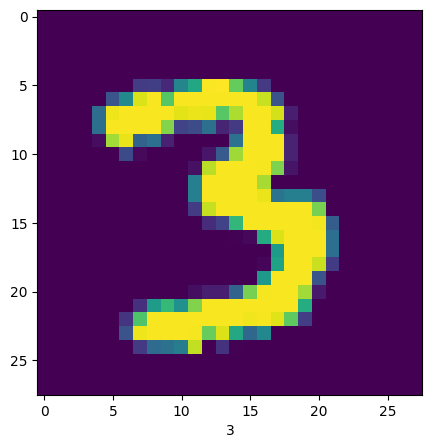

In [22]:
X_test_reshaped = x_test.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(5, 5))
i = 500
print(d[i])
plt.imshow(X_test_reshaped[i])
plt.xlabel(m[i]);
